## Prediction using Supervised ML 

##      by

# Sahil Yadav

### Importing Libraries

In [1]:
# Importing all libraries required
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(5) # it will show starting 5 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail(5) # it will show last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info() # it will show information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe() # it will describe the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting data

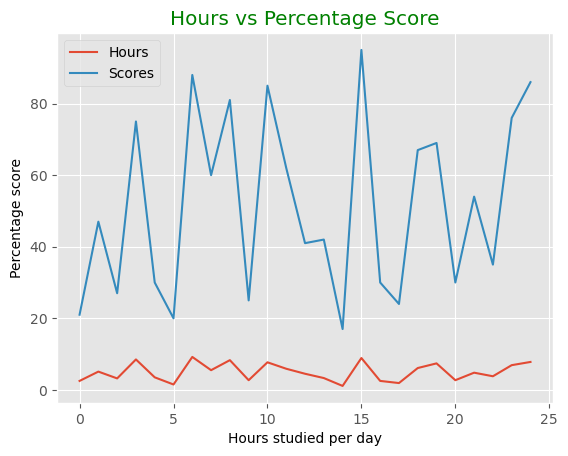

In [7]:
plt.style.use('ggplot')
data.plot(kind= 'line')
plt.title('Hours vs Percentage Score', color='green')
plt.xlabel('Hours studied per day')
plt.ylabel('Percentage score')
plt.show()

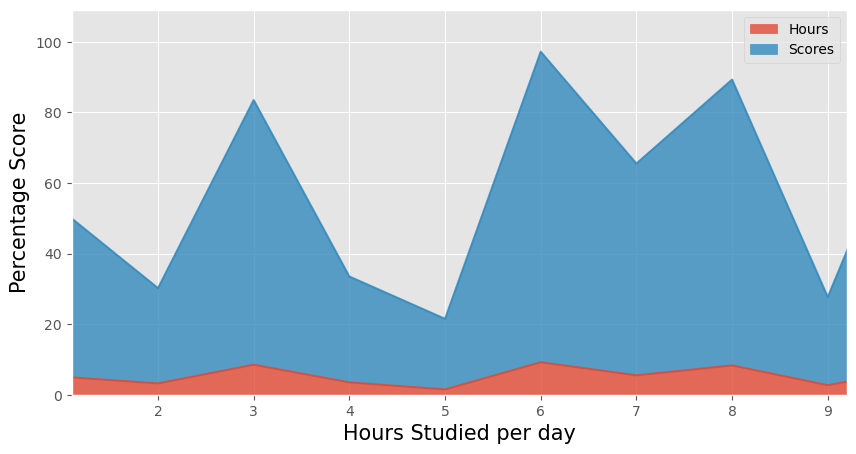

In [8]:
xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.xlabel('Hours Studied per day',size=15)
plt.ylabel('Percentage Score',size=15)
plt.show()

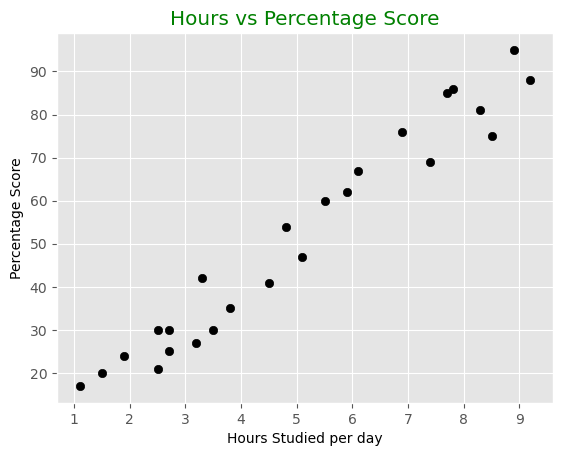

In [9]:
# Plotting the distribution of scores 
plt.scatter(x=data.Hours, y=data.Scores,color='black')
plt.title('Hours vs Percentage Score', color='green')
plt.xlabel('Hours Studied per day')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
data.isnull().sum() # checking for null values


Hours     0
Scores    0
dtype: int64

In [11]:
data.mean() # mean

Hours      5.012
Scores    51.480
dtype: float64

In [12]:
x = data.iloc[:,:-1].values
print("Shape of x",x.shape)

y = data.iloc[:,1].values
print("Shape of y",y.shape)

Shape of x (25, 1)
Shape of y (25,)


# Train_Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (18, 1)
Shape of x_test (7, 1)
Shape of y_train (18,)
Shape of y_test (7,)


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete")

Training Complete


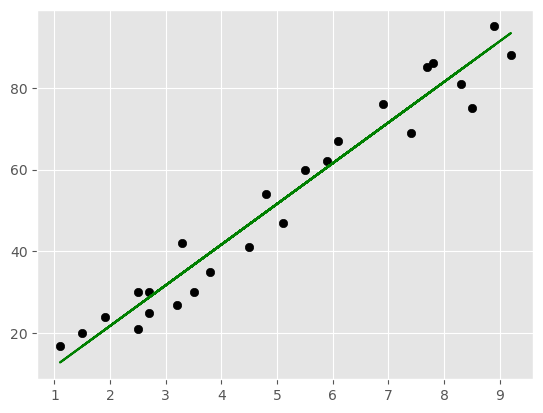

In [16]:
# Plotting the Regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,color='black')
plt.plot(x, line,color='green');
plt.show()


In [17]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [18]:
# Comparing Actual vs Predicted 
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Result

In [19]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("NO. of Hours =",format(hours))
print("Predicted Score =",format(own_pred[0]))

NO. of Hours = 9.25
Predicted Score = 93.89272889341655


In [20]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486


# Conclusion
From the above result obtained using linear regression, we can say that after studying for 9.25 hours the predicted score will be 93.893 with a mean absolute error of 4.13